# Ćwiczenie: Perceptron binarny
W tym ćwiczeniu zbudujesz i przetestujesz prosty perceptron do klasyfikacji otyłości na podstawie wzrostu i wagi. Postępuj krok po kroku zgodnie z instrukcjami w notatniku. Na końcu obliczysz dokładność na zestawie testowym.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Funkcja aktywacji (progowa)
def threshold_function(x: np.array, threshold: int = 0) -> np.array:
    return np.where(x >= threshold, 1, 0)


class Perceptron:

    def __init__(
        self,
        learning_rate=0.01,
        epochs=100,
        activation_function=threshold_function,
        start_weights=None,
        start_bias=None,
    ):

        # hiperparametry
        self.lr = learning_rate
        self.epochs = epochs
        self.activation_func = activation_function

        # parametry (uczone podczas treningu)
        self.weights = start_weights
        self.bias = start_bias or 0

    def fit(self, features, labels):

        n_samples, n_features = features.shape

        # Inicjalizacja wag zerami (jeśli nie podano startowych)
        self.weights = np.zeros(n_features)

        y = np.array(labels)

        # Pętla ucząca (epoki)
        for _ in range(self.epochs):
            # Iterujemy po wszystkich próbkach
            for i, x_i in enumerate(features):
                # Obliczamy wyjście liniowe
                linear_output = self._linear_output(x_i)

                # Przepuszczamy przez funkcję aktywacji
                y_predicted = self.activation_func(linear_output)

                # Obliczamy błąd (y_true - y_pred)
                # i wyznaczamy wielkość aktualizacji
                update = self.lr * (y[i] - y_predicted)

                # Aktualizacja wag i biasu
                self.weights += update * x_i
                self.bias += update

    def _linear_output(self, features):
        return features @ self.weights + self.bias

    def predict(self, features):
        linear_output = self._linear_output(features)
        y_predicted = self.activation_func(linear_output)
        return y_predicted

## Zadanie: wczytaj dane i przygotuj etykiety
Masz plik wzrost_waga.txt w tym samym katalogu. Każdy wiersz zawiera trzy wartości rozdzielone spacją lub tabem:
- wzrost w metrach (float),
- waga w kilogramach (float),
- etykieta klasy 0/1 (int), wyznaczona na podstawie BMI (próg 25).

Twoim zadaniem jest wczytać dane, wyodrębnić cechy X (wzrost, waga) i etykiety y (0/1).


In [23]:
# Funkcja pomocnicza do wczytania danych z pliku

def load_data_1(file_path):
    data = np.loadtxt(file_path, delimiter=",", skiprows=1)
    heights = data[:, 0] / 100
    weights = data[:, 1]
    bmi = weights / (heights ** 2)
    labels = np.where(bmi >= 25, 1, 0)
    
    return data, labels

def load_data_2(file_path):
    df = pd.read_csv(file_path)
    df["wzrost_m"] = df["wzrost"] / 100
    df["bmi"] = df["waga"] / df["wzrost_m"] ** 2
    labels = labels = np.where(df["bmi"] >= 25, 1, 0)
    features = df[["wzrost_m", "waga"]].to_numpy()
    return features, labels

load_data_2("wzrost_waga.txt")

(array([[  1.62,  48.  ],
        [  1.63,  60.  ],
        [  1.82,  60.  ],
        [  1.87, 107.  ],
        [  1.69,  59.  ],
        [  1.65,  60.  ],
        [  1.68,  67.  ],
        [  1.79, 107.  ],
        [  1.57,  75.  ],
        [  1.6 ,  85.  ],
        [  1.67,  62.  ],
        [  1.73,  72.  ],
        [  1.79, 100.  ],
        [  1.65,  74.  ],
        [  1.59,  55.  ],
        [  1.65,  57.  ],
        [  1.75,  71.  ],
        [  1.57,  56.  ],
        [  1.68,  87.  ],
        [  1.68,  82.  ],
        [  1.64,  74.  ],
        [  1.82,  77.  ],
        [  1.63,  56.  ],
        [  1.62,  70.  ],
        [  1.59,  78.  ],
        [  1.88,  69.  ],
        [  1.62,  80.  ],
        [  1.76,  91.  ],
        [  1.55,  81.  ],
        [  1.87,  79.  ]]),
 array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0]))

In [24]:
# 1. Wczytaj dane
X, y = load_data_2("wzrost_waga.txt")
y

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0])

In [25]:
# 2. Utwórz i wytrenuj perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=50)
perceptron.fit(X, y)
print("Wyuczone wagi:", perceptron.weights)
print("Wyuczony bias:", perceptron.bias)

Wyuczone wagi: [-20.432  -0.3  ]
Wyuczony bias: -11.699999999999974


In [26]:
# Sprawdź na danych testowych, jak działa model
# Dane: [wzrost (m), waga (kg), klasa]
# Klasa obliczona na podstawie BMI (próg = 25)
data = np.array(
    [
        [1.60, 50, 0],  # BMI = 19.5 → klasa 0
        [1.75, 68, 0],  # BMI = 22.2 → klasa 0
        [1.80, 90, 1],  # BMI = 27.8 → klasa 1
        [1.65, 80, 1],  # BMI = 29.4 → klasa 1
        [1.90, 95, 1],  # BMI = 26.3 → klasa 1
        [1.70, 60, 0],  # BMI = 20.8 → klasa 0
        [1.55, 70, 1],  # BMI = 29.1 → klasa 1
    ]
)

print(data[:, 1] / data[:, 0] ** 2)

# Podział na cechy (X) i etykiety (y)
X = data[:, :2]  # wzrost, waga
y = data[:, 2]  # klasa

# Dla testu możemy użyć np. wszystkich danych (albo podzielić na train/test)
X_test = X
y_test = y

print("X_test:\n", X_test)
print("y_test:", y_test)

[19.53125    22.20408163 27.77777778 29.38475666 26.31578947 20.76124567
 29.13631634]
X_test:
 [[ 1.6  50.  ]
 [ 1.75 68.  ]
 [ 1.8  90.  ]
 [ 1.65 80.  ]
 [ 1.9  95.  ]
 [ 1.7  60.  ]
 [ 1.55 70.  ]]
y_test: [0. 0. 1. 1. 1. 0. 1.]


In [27]:
# 3. Ocena: dokładność na danych testowych
try:
    y_pred = perceptron.predict(X_test)
    acc = (y_pred == y_test).mean()
    print("Dokładność na teście:", round(float(acc), 3))
except NameError:
    print("Upewnij się, że zdefiniowałeś/aś i wytrenowałeś/aś obiekt 'perceptron'.")

Dokładność na teście: 0.429


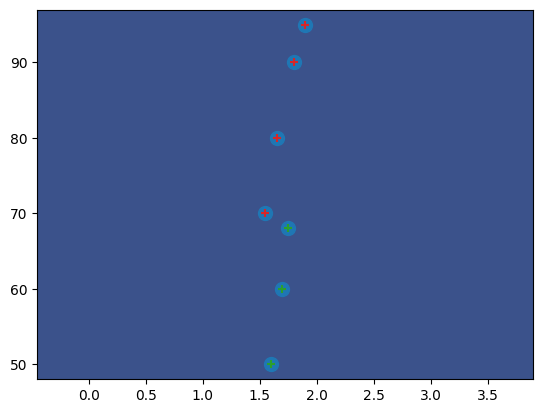

In [28]:
def make_meshgrid(X, n_points=200, margin=2):

    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, n_points),
        np.linspace(y_min, y_max, n_points),
    )

    return xx, yy


def predict_on_mesh(model, xx, yy):
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    return Z.reshape(xx.shape)
    

def plot_decision_bounduary(X, y, model):
    xx, yy  = make_meshgrid(X)
    Z = predict_on_mesh(model, xx, yy)
    y_pred = model.predict(X)

    plt.contourf(xx, yy, Z)

    # predykcje
    plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=100)
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=100)

    # rzeczywiste etykiety
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="+")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="+")


plot_decision_bounduary(X_test, y_test, perceptron)